In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
X = iris.data

model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [32]:
labels = model.predict(X)
print(f"first 10 labels: {labels[:10]}")
print(f"first 10 target: {iris.target[:10]}")

first 10 labels: [0 0 0 0 0 0 0 0 0 0]
first 10 target: [0 0 0 0 0 0 0 0 0 0]


In [10]:
centroids = model.cluster_centers_

In [5]:
print(f"last 10 labels: {labels[-10:]}")
print(f"last 10 target: {iris.target[-10:]}")

last 10 labels: [2 2 1 2 2 2 1 2 2 1]
last 10 target: [2 2 2 2 2 2 2 2 2 2]


In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### scatter plot of 'sepal length' vs 'petal length'

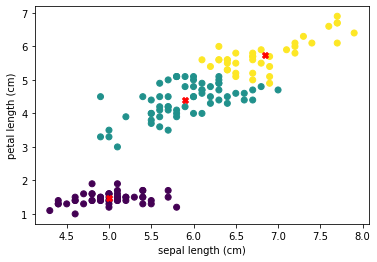

In [18]:
xs = X[:, 0]
ys = X[:, 2]

fig, ax = plt.subplots()
ax.scatter(xs,  ys, c=labels)
ax.scatter(centroids[:, 0], centroids[:, 2], marker="X", c='red')
ax.set(xlabel='sepal length (cm)',
       ylabel='petal length (cm)')
plt.show()

#### Visually comparing the predicted labels and actual labels

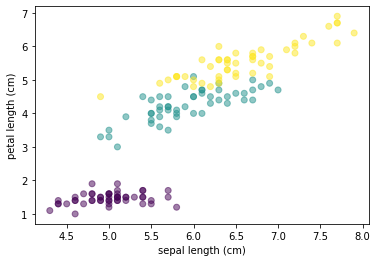

In [19]:
xs = X[:, 0]
ys = X[:, 2]

fig, ax = plt.subplots()
ax.scatter(xs,  ys, c=iris.target, alpha=0.5)
ax.set(xlabel='sepal length (cm)',
       ylabel='petal length (cm)')
plt.show()

#### cross-tab

In [25]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [35]:
species = []
for idx, elem in enumerate(iris.target):
    if elem == 0:
        species.append('setosa')
    elif elem == 1:
        species.append('versicolor')
    else:
        species.append('verginica')

In [38]:
species[:10]

['setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa']

In [40]:
df = pd.DataFrame({'labels': pd.Series(labels, dtype='category'), 'species': species})
df.head()

labels species
0      0  setosa
1      0  setosa
2      0  setosa
3      0  setosa
4      0  setosa

In [41]:
ct = pd.crosstab(df['labels'], df['species'])
ct

species  setosa  verginica  versicolor
labels                                
0            50          0           0
1             0         14          48
2             0         36           2

## Evaluating a clustering

In [20]:
model.inertia_

78.851441426146

In [22]:
x = np.arange(1, 11, 1)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

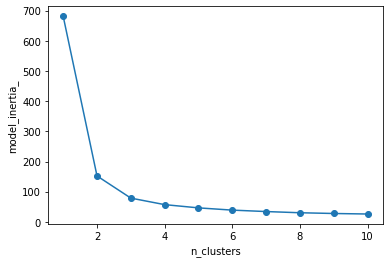

In [24]:
inertia = []
for i in x:
    temp_model = KMeans(n_clusters=i)
    temp_model.fit(X)
    inertia.append(temp_model.inertia_)

fig, ax = plt.subplots()
ax.scatter(x, inertia)
ax.plot(x, inertia)
ax.set(xlabel='n_clusters', ylabel="model_inertia_")
plt.show()

## Clustering the wines

In [42]:
wines = datasets.load_wine()
wines.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [43]:
wines.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [44]:
wines.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [47]:
model = KMeans(n_clusters=3)
labels = model.fit_predict(wines.data)

In [49]:
pd.Series(labels).unique()

array([0, 1, 2], dtype=int32)

In [50]:
# Clusters vs varieties
varieties = pd.Series(wines.target, dtype='category').cat.rename_categories({0: 'Barbera', 1: 'Barolo', 2: 'Grignolino'})
ct = pd.crosstab(pd.Series(labels, dtype='category'), varieties)
ct

col_0  Barbera  Barolo  Grignolino
row_0                             
0           46       1           0
1           13      20          29
2            0      50          19

**in KMeans feature variance = feature influence**

**Using StandardScaler to transform each feature to have mean 0 and variance 1**

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [55]:
scaler = StandardScaler()

pipeline = make_pipeline(scaler, model)
pipeline.fit(wines.data)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [57]:
labels = pipeline.predict(wines.data)
ct = pd.crosstab(pd.Series(labels, dtype='category'), varieties, rownames=['labels'], colnames=['varieties'])
ct

varieties  Barbera  Barolo  Grignolino
labels                                
0                0       3          48
1                0      65           0
2               59       3           0